# Using merge_ordered()

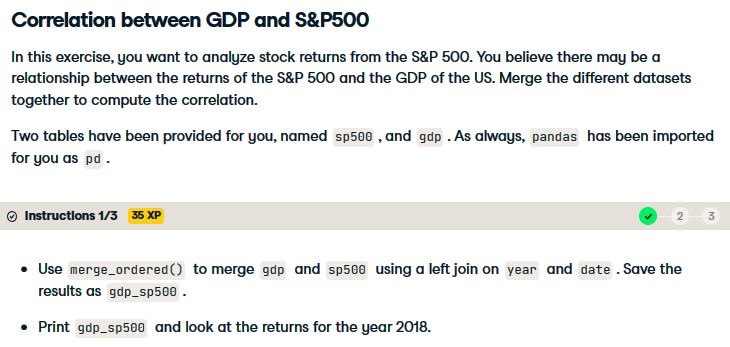# 

In [ ]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on="year", right_on="date", 
                             how="left")

# Print gdp_sp500
print(gdp_sp500)

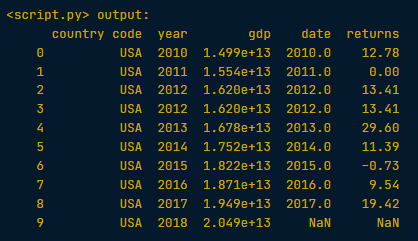

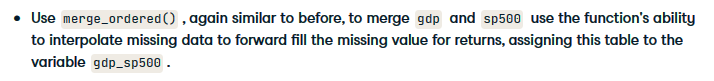

In [ ]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on="year", right_on="date", 
                             how="left", fill_method="ffill")

# Print gdp_sp500
print (gdp_sp500)

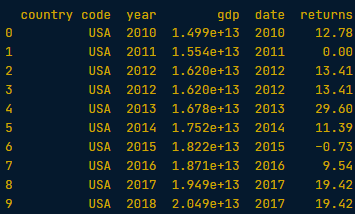

In [ ]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[["gdp", "returns"]]

# Print gdp_returns correlation
print(gdp_returns.corr())

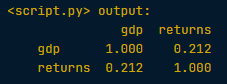

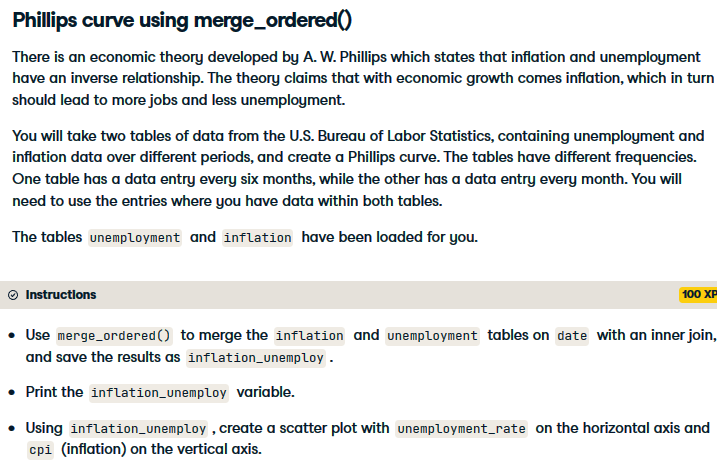

In [ ]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, how="inner")

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(x = "unemployment_rate", y = "cpi", kind="scatter")
plt.show()

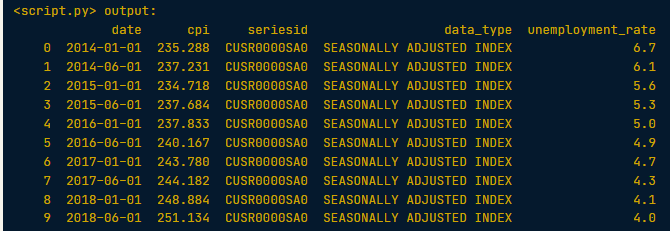
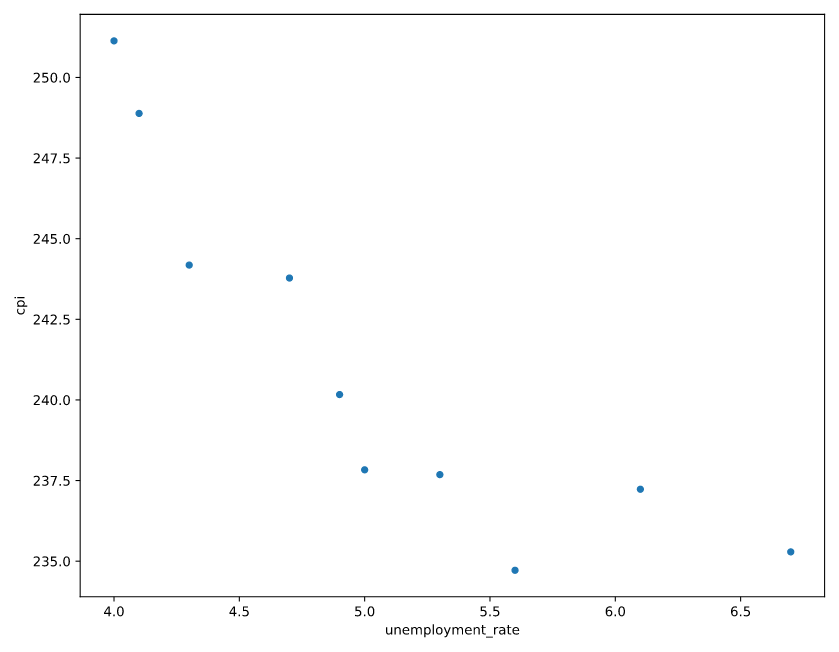

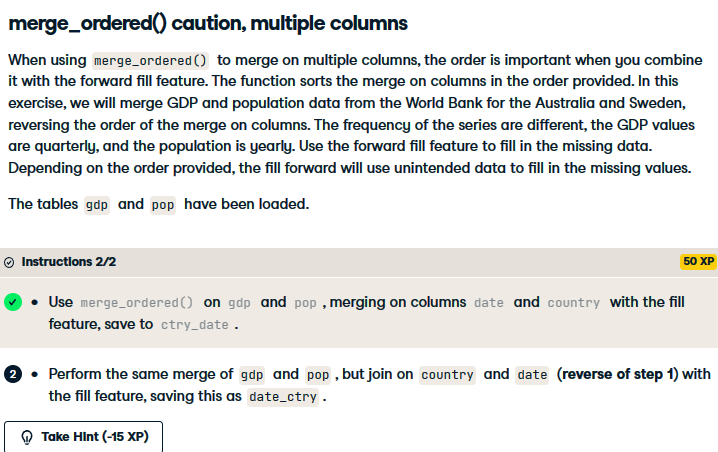

In [ ]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on=["date","country"],
                             fill_method='ffill')

# Print ctry_date
print(ctry_date)

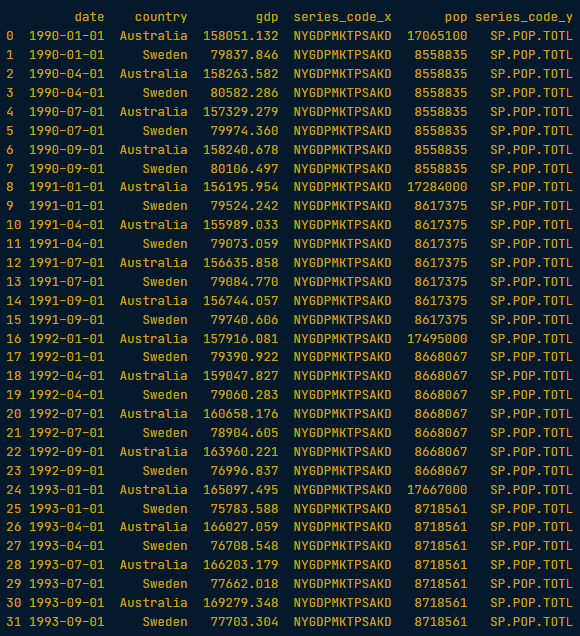

In [ ]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on=["country", "date"],
                             fill_method='ffill')

# Print date_ctry
print(date_ctry)

### จะสังเกตว่าการใช้แบบ country ขึ้นก่อนจะดีกว่า เพราะลำดับการเรียงถ้าเราเอา country ไว้ข้างหน้า โปรแกรมจะจัดเรียง country ก่อน date ดังนั้นการดูข้อมูลจะดีขึ้น
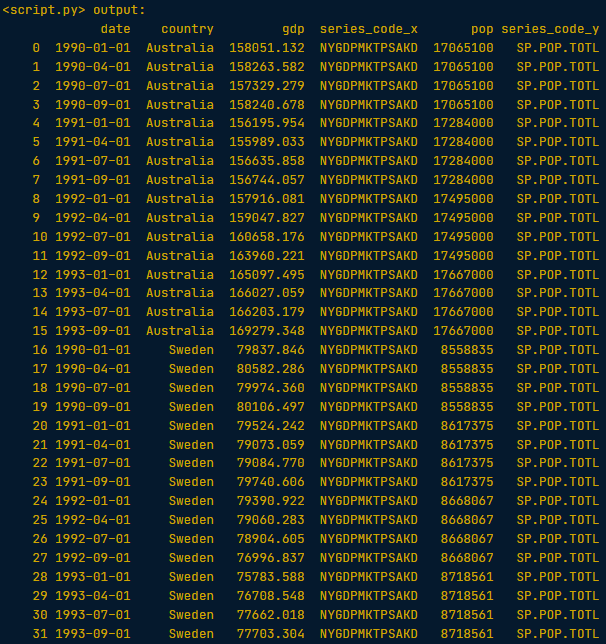

# Using merge_asof()

ใช้สำหรับ merge ข้อมูลในลักษณะของ left join

แต่แตกต่างกันตรงที่เวลา merge ข้อมูล

ตรงที่เป็น key เราจะ merge ตัวที่เกือบจะเหมือนกัน

เกือบในที่นี้ก็คือ น้อยกว่าหรือเท่ากับตัวตั้ง(ฝั่งซ้าย) # เป็น default ที่ตั้งไว้

แต่ถ้ากำหนดให้ภายในฟังก์ชัน direction="forward" จะเป็นกรณีตรงข้ามคือ มากกว่าหรือเท่ากับตัวตั้งคือฝั่งซ้าย

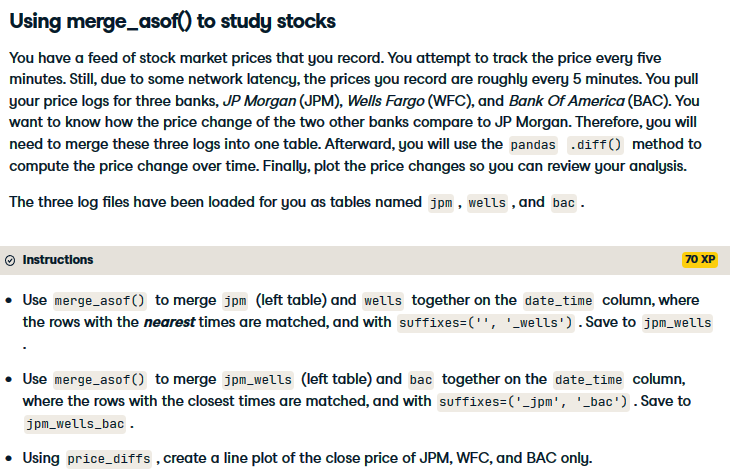

In [ ]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on="date_time", suffixes=("", "_wells"), direction="nearest")


# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on="date_time", suffixes=("_jpm", "_bac"), direction="nearest")


# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=["close_jpm", "close_wells", "close_bac"])
plt.show()

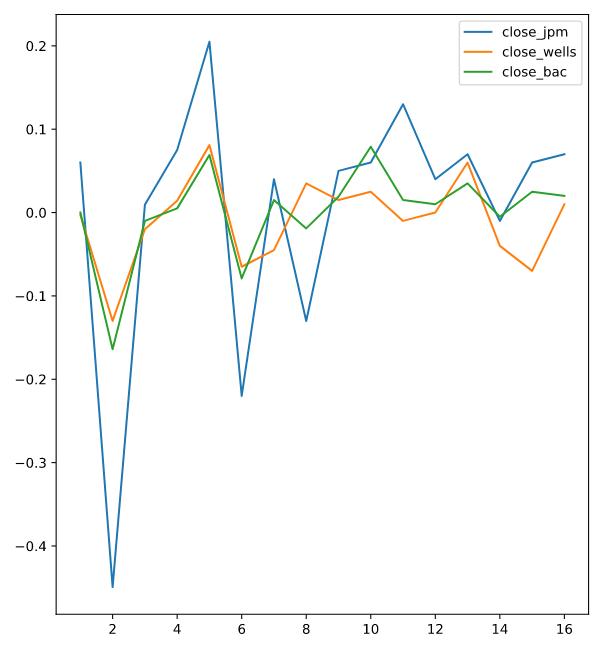

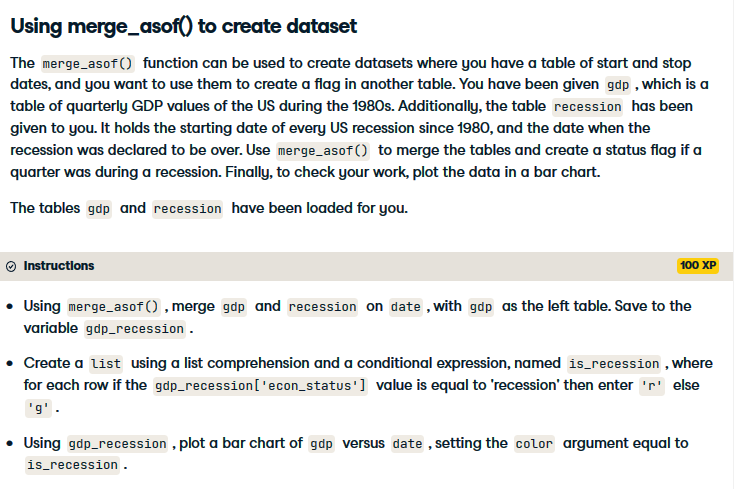
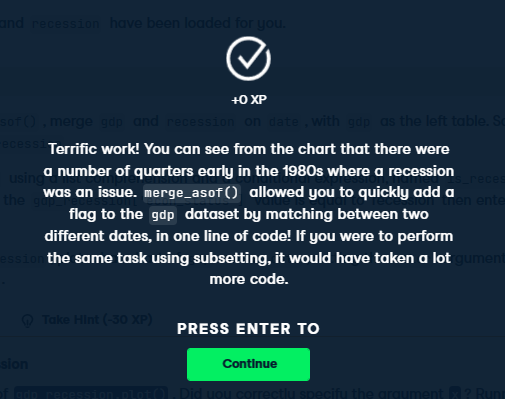

In [ ]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on="date")

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ["r" if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind="bar", y="gdp", x="date", color=is_recession, rot=90)
plt.show()

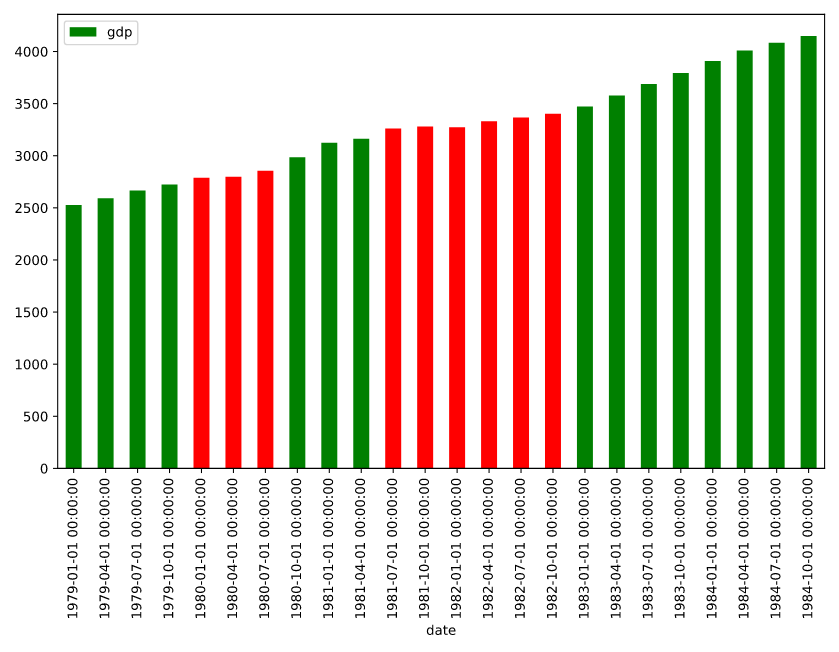

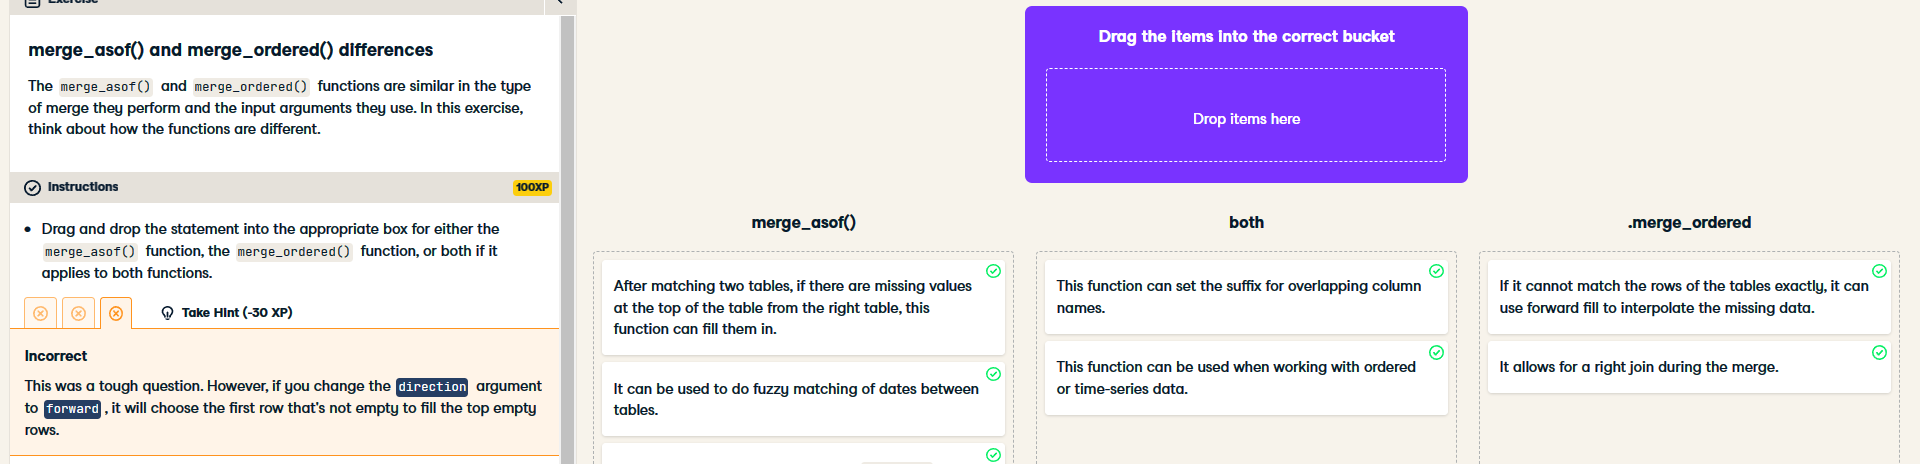

# Selecting data with .query()

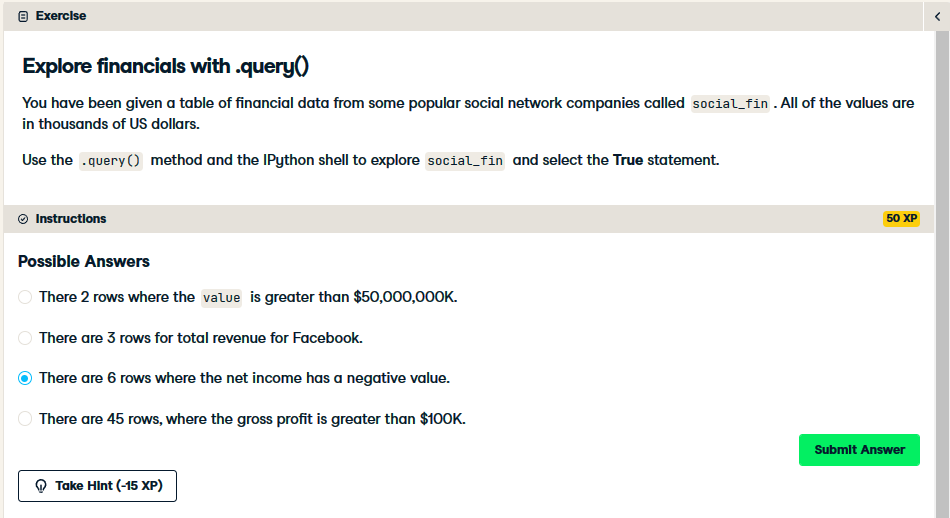

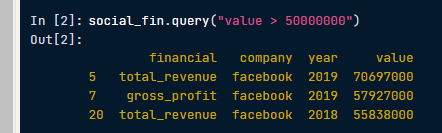

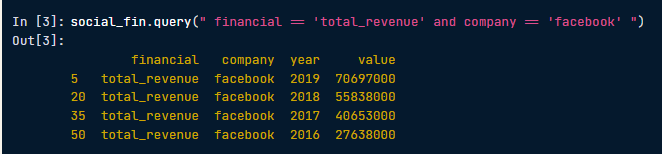

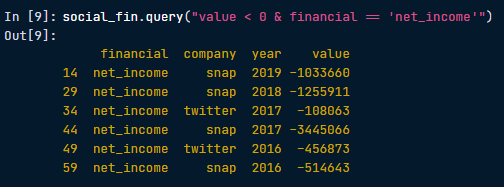

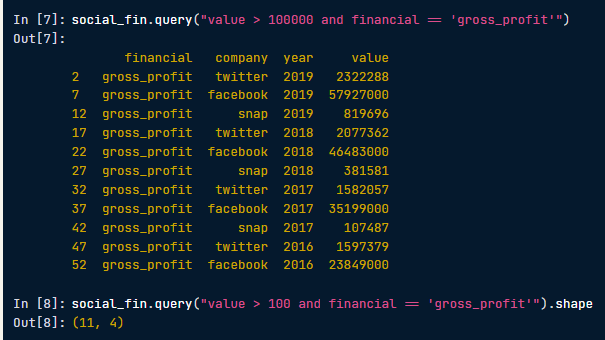

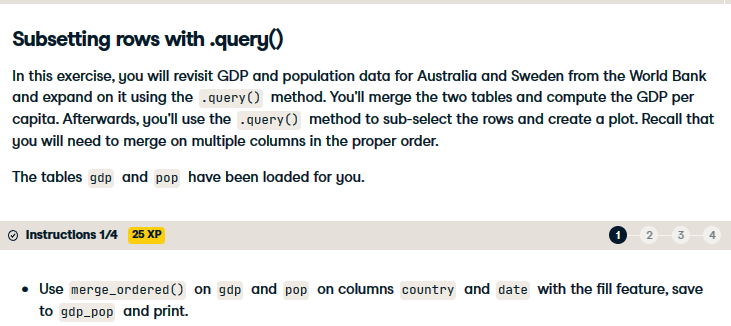

In [ ]:
import pandas as pd

In [ ]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=["country", "date"], fill_method="ffill")

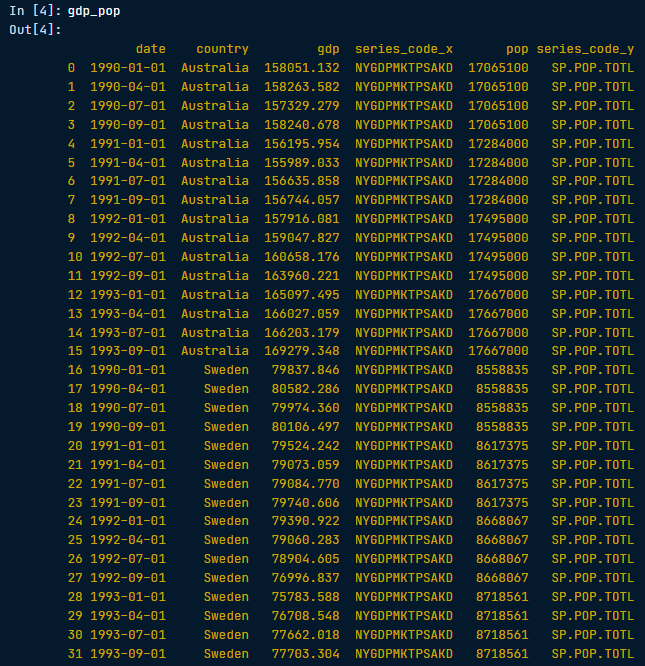

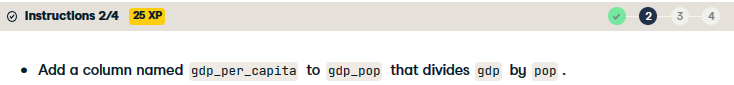

In [ ]:
# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

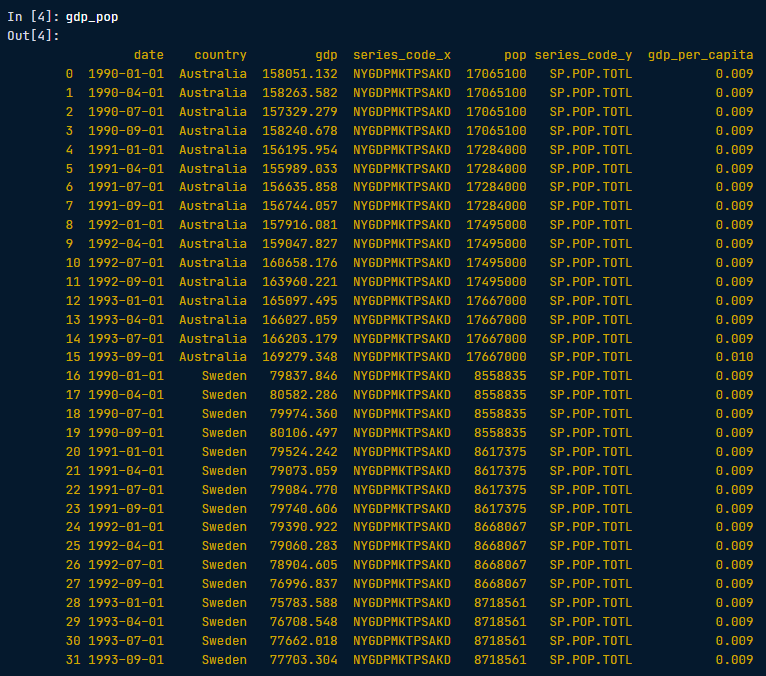

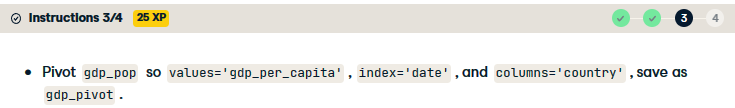

In [ ]:
# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table(values = "gdp_per_capita", index = "date", columns = "country")

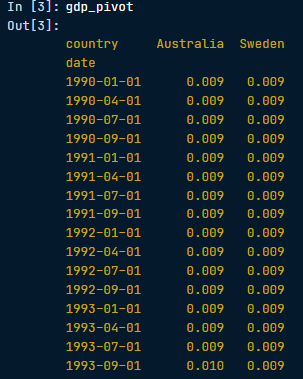

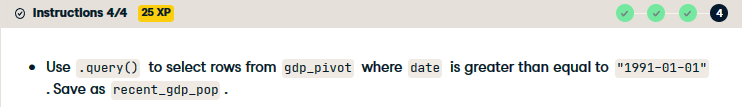

In [ ]:
# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query("date >= '1991-01-01'")

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

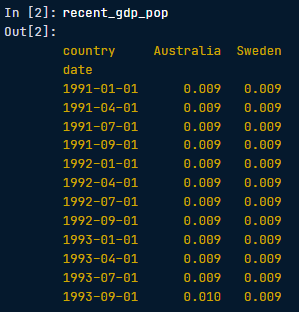

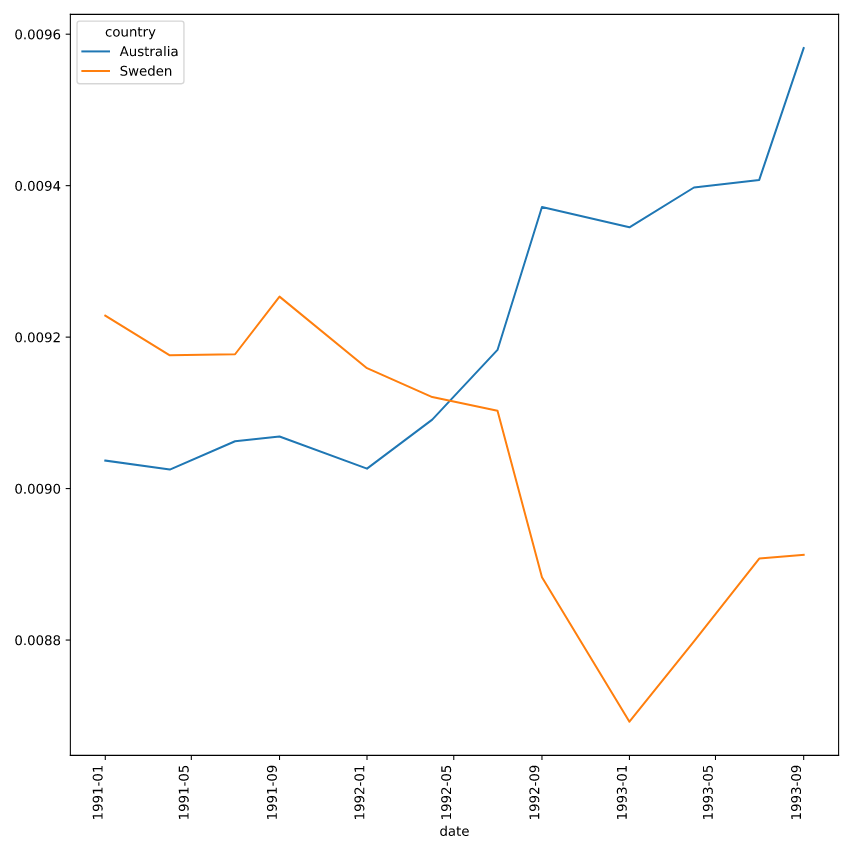

# Reshaping data with .melt()

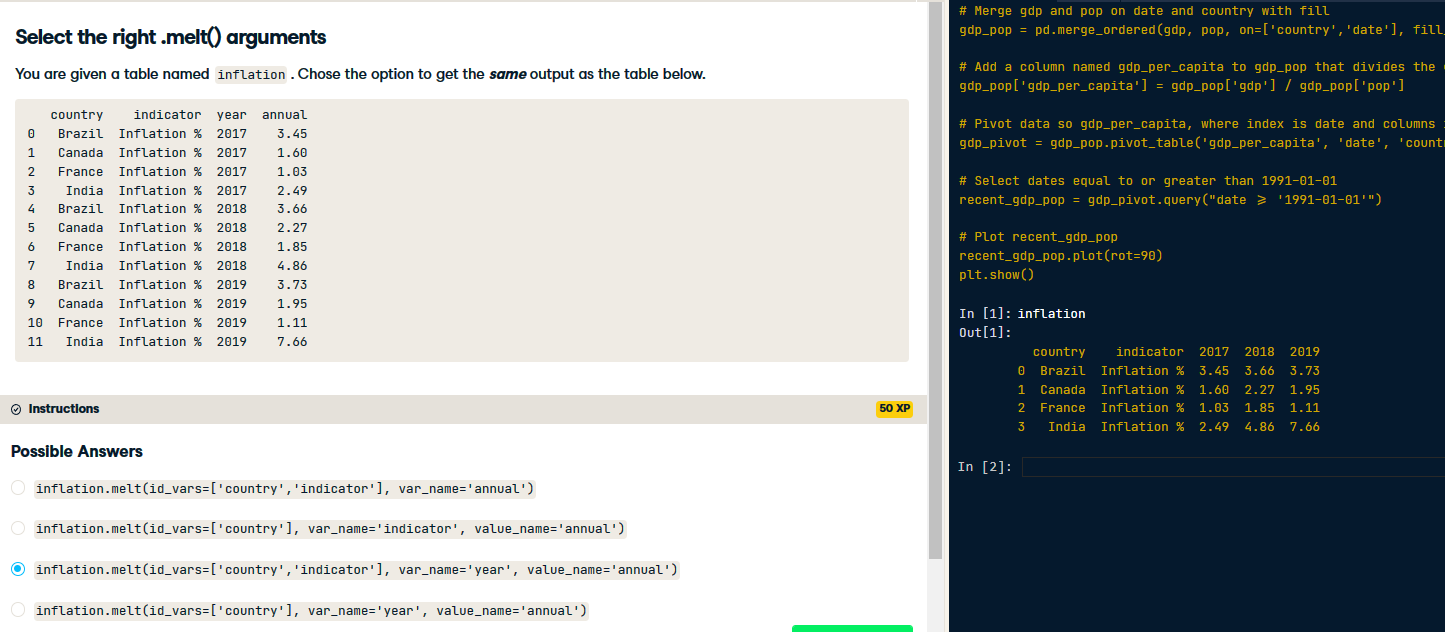

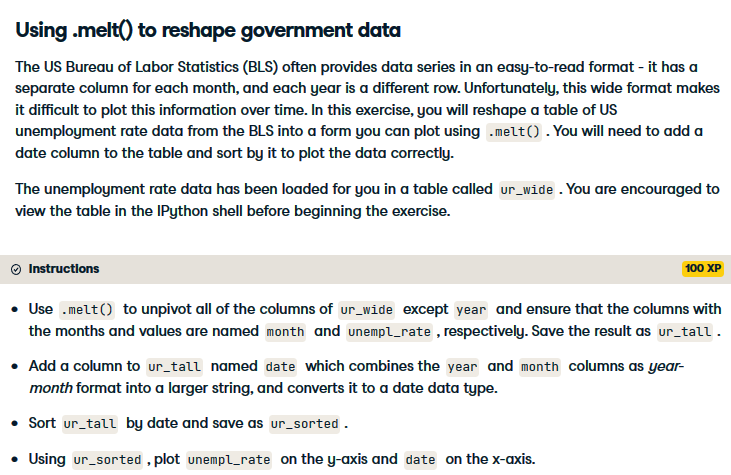

In [ ]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=["year"], var_name="month", value_name="unempl_rate")

# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values("date")

# Plot the unempl_rate by date
ur_sorted.plot(x="date", y="unempl_rate")
plt.show()

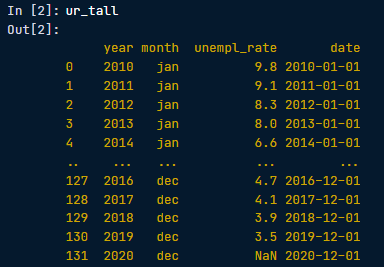

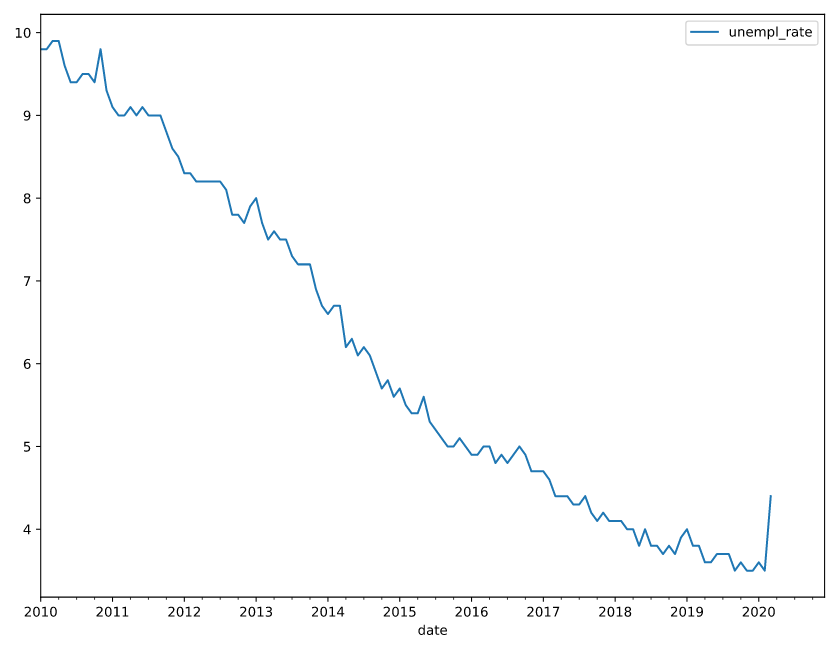

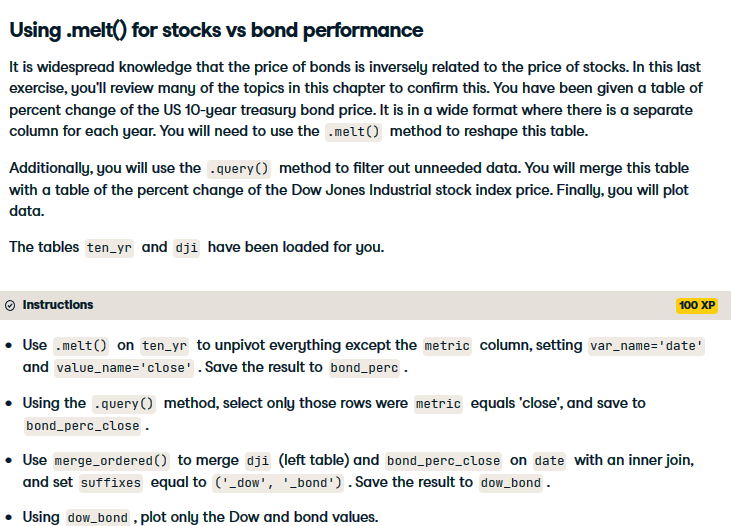

In [ ]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars=["metric"], var_name="date", value_name="close")
print(bond_perc)

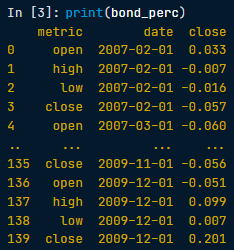

In [1]:
# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query("metric == 'close'")
print(bond_perc_close)

NameError: name 'bond_perc' is not defined

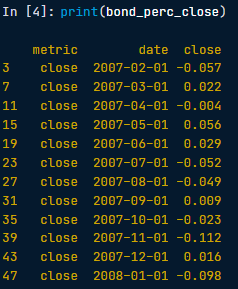

In [ ]:
# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on="date", how="inner", suffixes=("_dow", "_bond"))
print(dow_bond)

NameError: name 'pd' is not defined

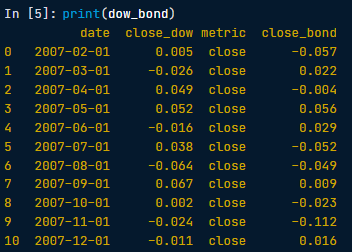

In [ ]:
# Plot only the close_dow and close_bond columns
dow_bond.plot(y=["close_dow", "close_bond"], x='date', rot=90)
plt.show()

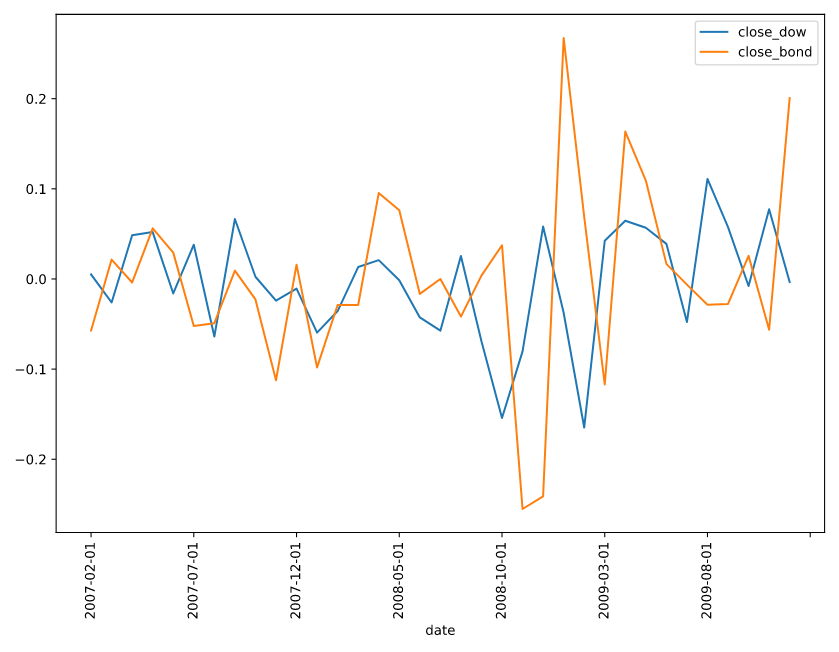